In [ ]:
# Import modules
# %matplotlib inline

import math
import random
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [ ]:
# Input parameters

NA = 6.023*10**23
V = 1.15*10**-15

# Initial number of molecules for each species
A0 = 500
B0 = 500
C0 = 0

# Rate constants
kf = 2.408*10**4
kf_stoch = kf/(NA*V)
kb = 0.01

# Times
t0 = 0.0 # start time
tmax = 1000 #end time

In [ ]:
# Initiatialize several simulation runs
nruns = 100
ntimes = []
ncountsA = []
ncountsB = []
ncountsC = []

for n in range(nruns):

    #Initialize the counts

    times = []
    times.append(t0)
    countsA = []
    countsA.append(A0)
    countsB = []
    countsB.append(B0)
    countsC = []
    countsC.append(C0)

    # Initialize variables

    t = t0
    A = A0
    B = B0
    C = C0

    # Main loop

    while t<tmax:
        a1 = kf_stoch*A*B # propensity of reaction1
        a2 = kb*C # propensity of reaction2
        a = a1+a2

        r = np.random.uniform(0.0,1.0,2) #generate 2 random numbers between 0.0 and 1.0
        dt = -math.log(r[0])/a
        t = t + dt

        if r[1]<a1/a: # first reaction occurs
            A = A-1
            B = B-1
            C = C+1
        else:         # second reaction occurs
            A = A+1
            B = B+1
            C = C-1

        countsA.append(A)
        countsB.append(B)
        countsC.append(C)
        times.append(t)

    # print(countsA)
    ntimes.append(times)
    ncountsA.append(countsA)
    ncountsB.append(countsB)
    ncountsC.append(countsC)

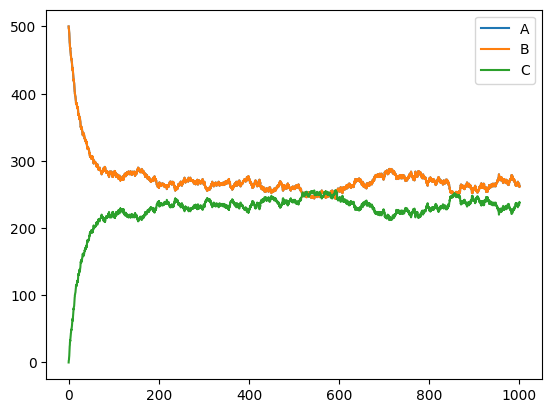

In [ ]:
plt.plot(ntimes[0],ncountsA[0], label='A')
plt.plot(ntimes[0],ncountsB[0], label='B')
plt.plot(ntimes[0],ncountsC[0], label='C')
plt.legend(loc='best')
plt.show()

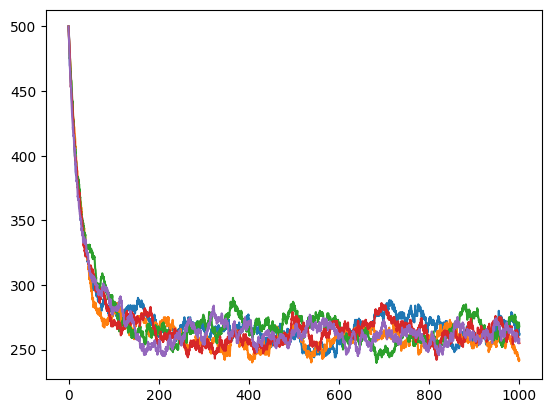

In [ ]:
for n in range(5):
    plt.plot(ntimes[n], ncountsA[n])
# for n in range(5):
#     plt.plot(ntimes[n], ncountsC[n])

In [ ]:
cA = list(itertools.chain(*ncountsA))
cB = list(itertools.chain(*ncountsB))
cC = list(itertools.chain(*ncountsC))

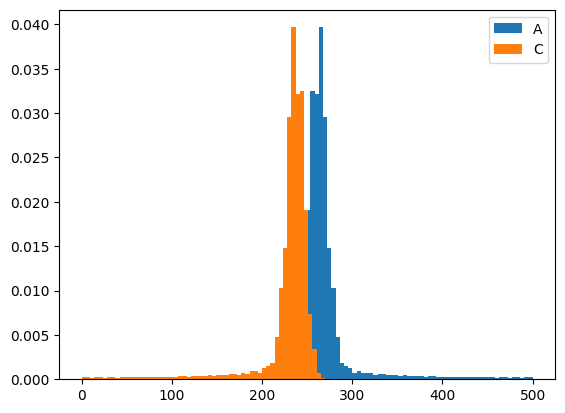

In [ ]:
plt.hist(cA,bins=60,label='A',density=True)
plt.hist(cC,bins=60,label='C',density=True)
plt.legend(loc='best')
plt.show()

In [ ]:
(bins,edges) = np.histogram(cC,np.arange(-0.5,np.max(cA)+1.5,1))
centers = (edges[:-1]+edges[1:])/2
pdf = np.zeros((len(bins),2),dtype=float)
pdf[:,0]=centers
pdf[:,1] = bins/(np.sum(bins)*(centers[1]-centers[0]))
print("Finished the calculating stationary PDF using %d data points",len(cA))

Finished the calculating stationary PDF using %d data points 485990


Text(0, 0.5, 'P(C)')

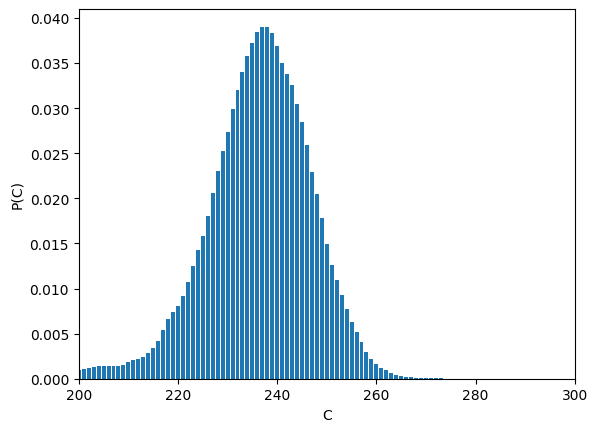

In [ ]:
plt.bar(pdf[:,0],pdf[:,1])
plt.xlim([200,300])
plt.xlabel('C')
plt.ylabel('P(C)')